# Synthesis Project

In [1]:
import json

### Here we create the chunked file

In [19]:
short_name = 'ATL03'
spatial_extent = [19, 59, 32, 69] # [lower left lon, lower left lat, upper right lon, upper right lat]
date_range = ['2018-11-26','2018-11-26']

with open("variables.json", "w") as jsonfile:
    json.dump({"short_name": short_name,"spatial_extent": spatial_extent ,"date_range": date_range }, jsonfile)

In [22]:
%run DataSelection.py

Map(center=[64.0, 25.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [36]:
%run SelectionAndDownloadData.py

The following granules are available for download:
Granule ATL03_20181126113908_08990102_006_02.h5
Granule ATL03_20181126114738_08990103_006_02.h5


Invalid granule number. Please try again.
Invalid granule number. Please try again.
Invalid granule number. Please try again.
Invalid granule number. Please try again.
Invalid granule number. Please try again.
Invalid granule number. Please try again.
Invalid granule number. Please try again.
Invalid granule number. Please try again.
Invalid granule number. Please try again.
Invalid granule number. Please try again.
Invalid granule number. Please try again.
Too many invalid inputs. Exiting...


In [2]:
file_name_ATL08 = "ATL08_20181126114738_08990103_005_01.h5"
file_name_ATL03 = "ATL03_20181126114738_08990103_006_02.h5"

consecutive_data = 50

# Save the variables to a JSON file
with open("variables.json", "w") as jsonfile:
    json.dump({"file_name_ATL08": file_name_ATL08,"file_name_ATL03": file_name_ATL03 ,"threshold": consecutive_data }, jsonfile)

### Chunking the file

Selected interval: 525 - 575
Max height: 84.60678
Min height: 61.332558
Delta Ground: 23.274223 m


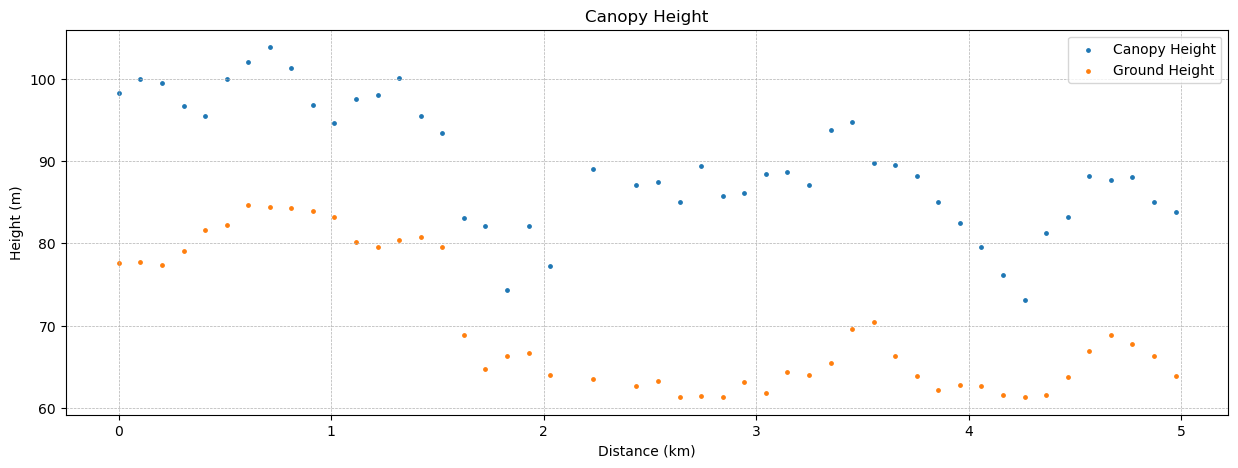

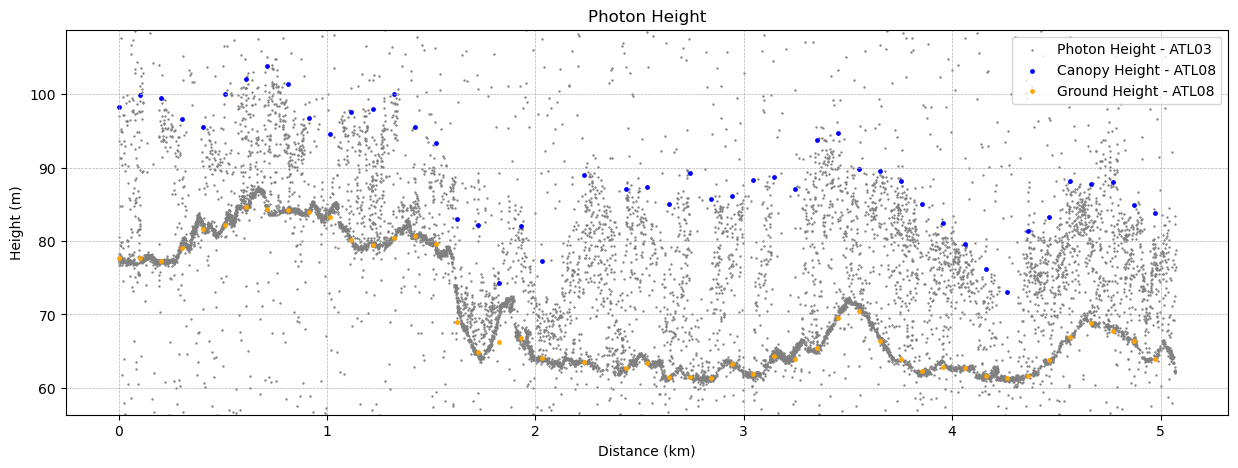

A file with the name chunked_canopy.hdf5 already exists in the folder.
Do you want to overwrite it? (y/n)
The file was overwritten.


In [3]:
%run Create_Chunked_File.py

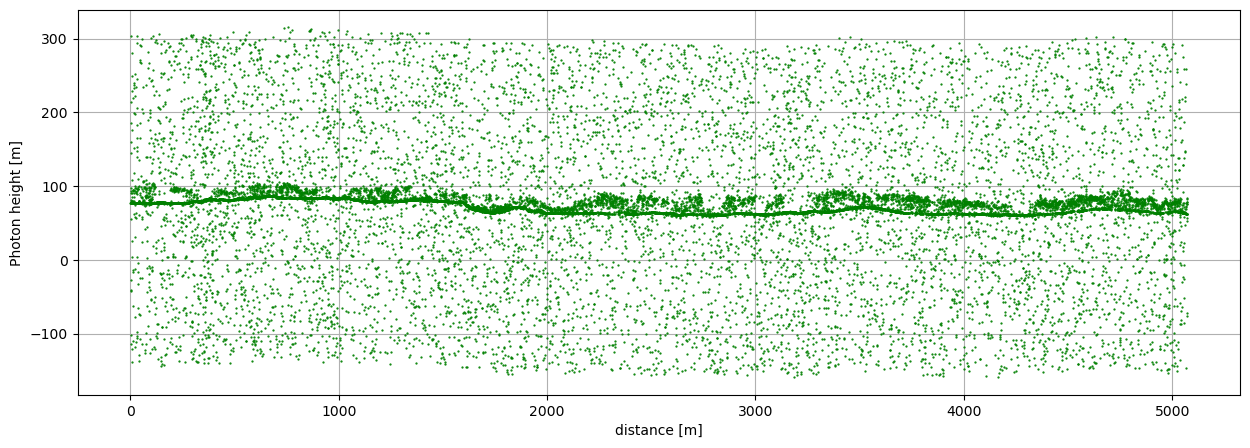

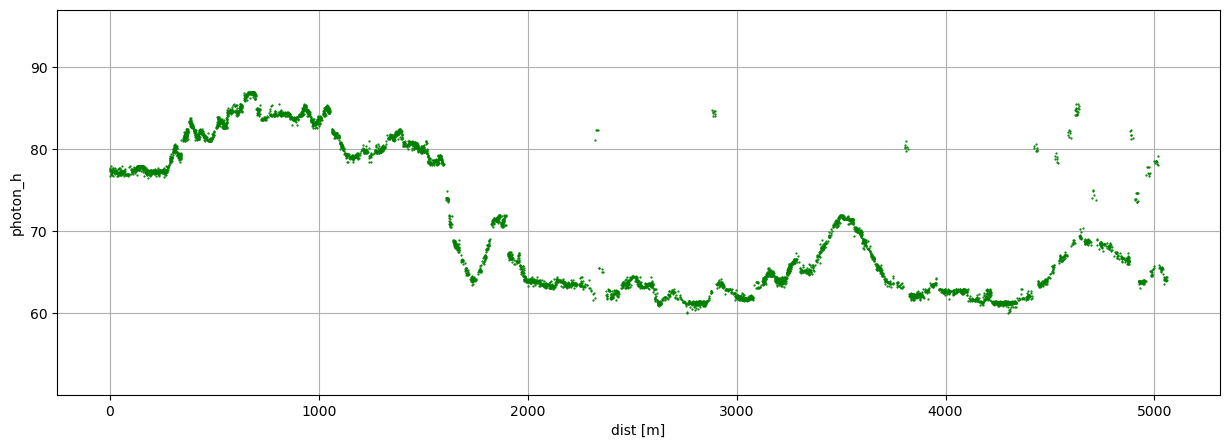

In [4]:
%run Binning.py

## Better output and Removing Outliers

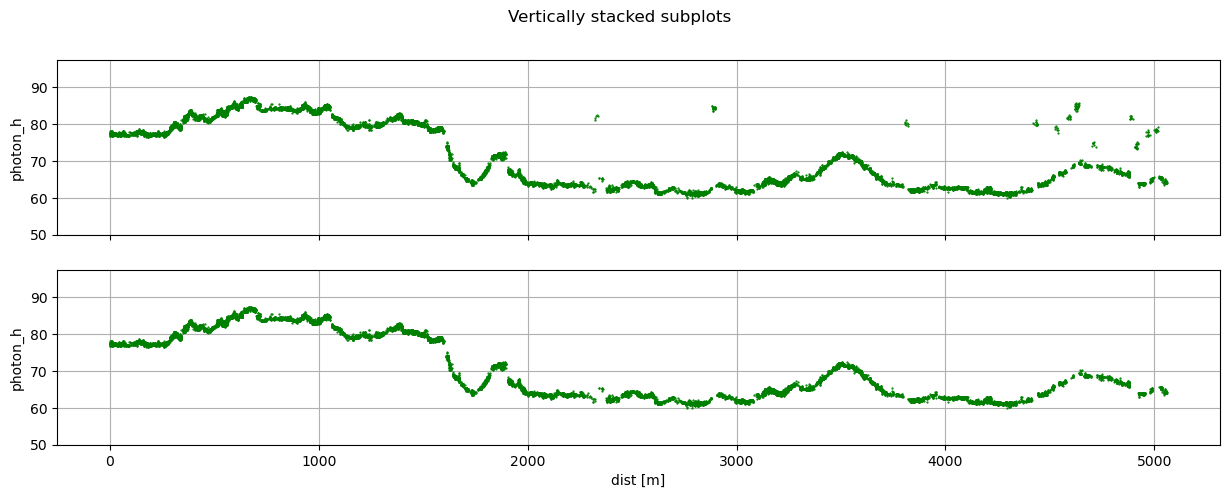

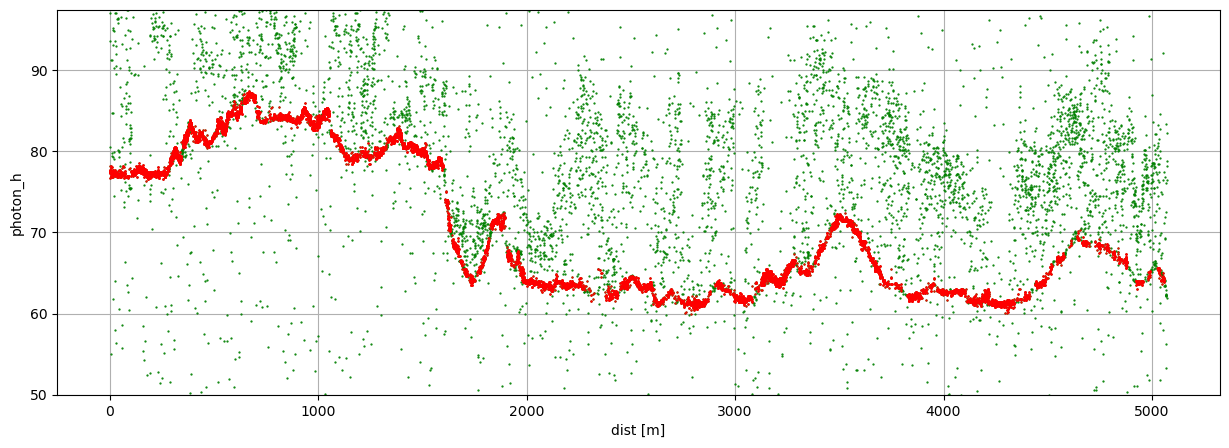

In [5]:
%run RemovingOutliers.py

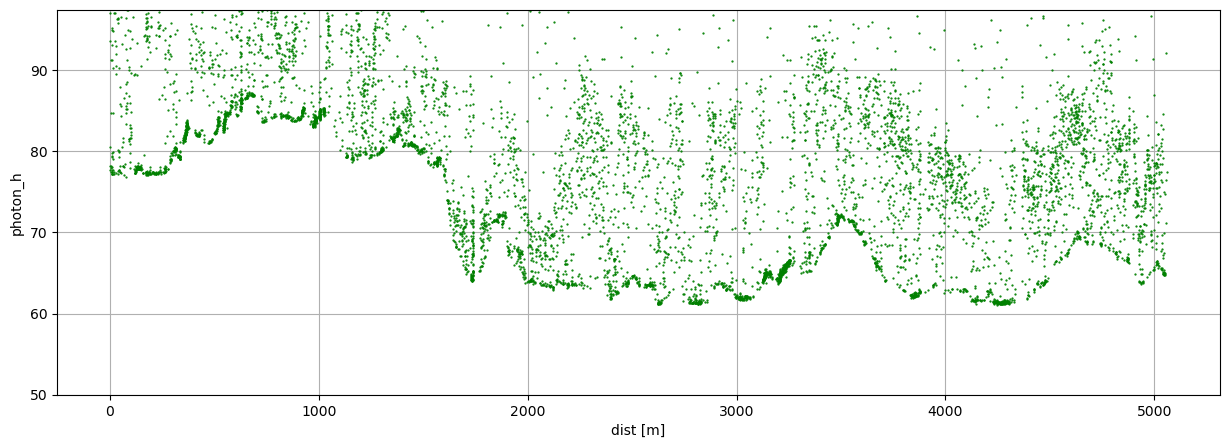

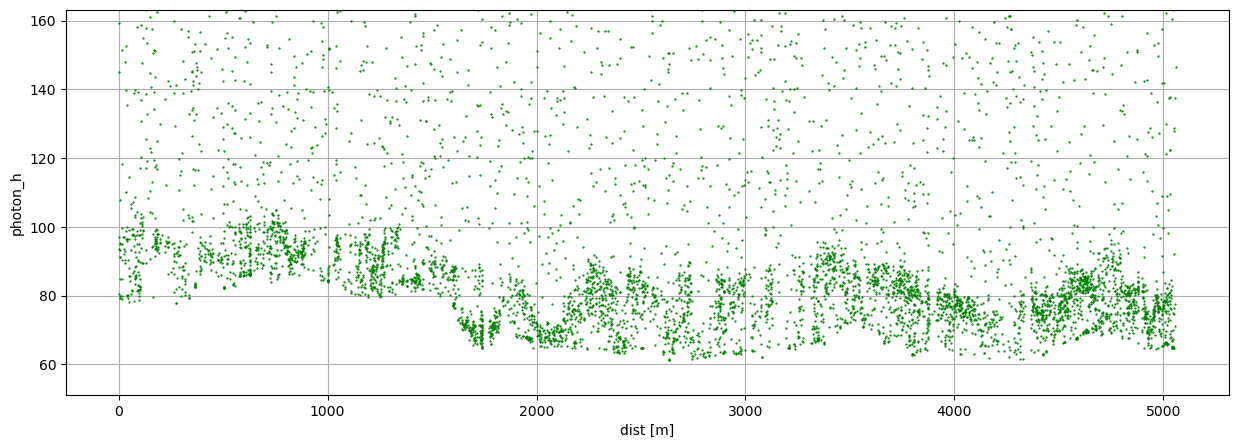

In [6]:
%run RemoveBelowPoints.py

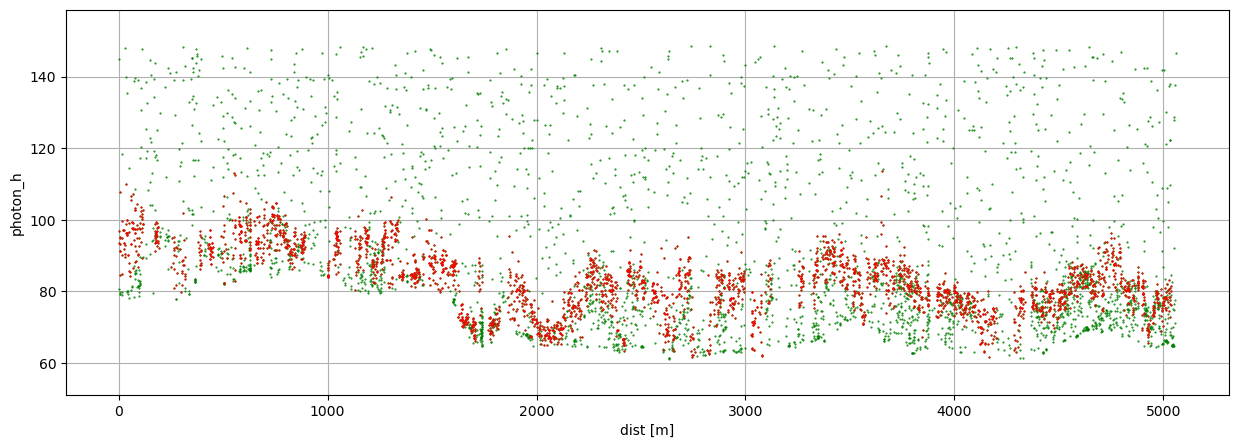

In [7]:
%run CanopyDetection.py

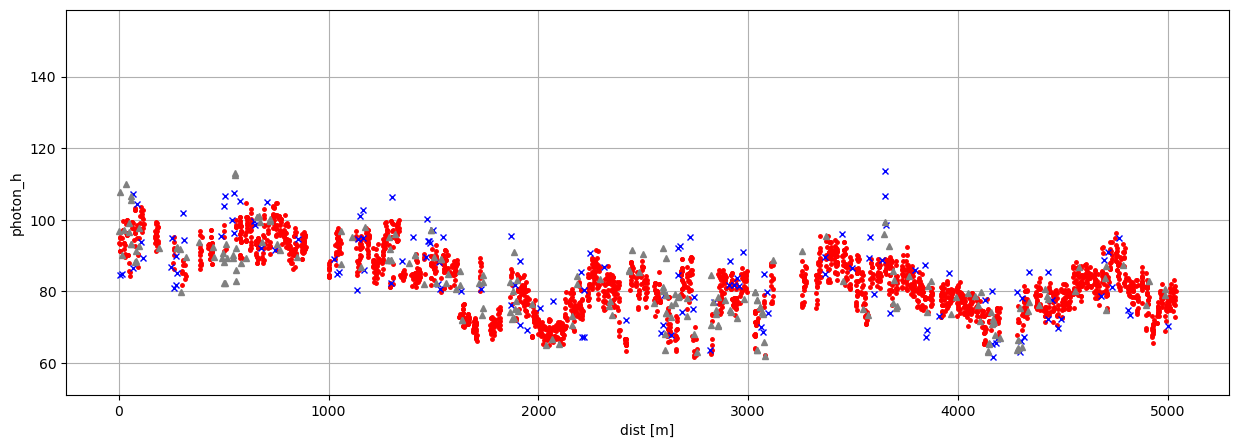

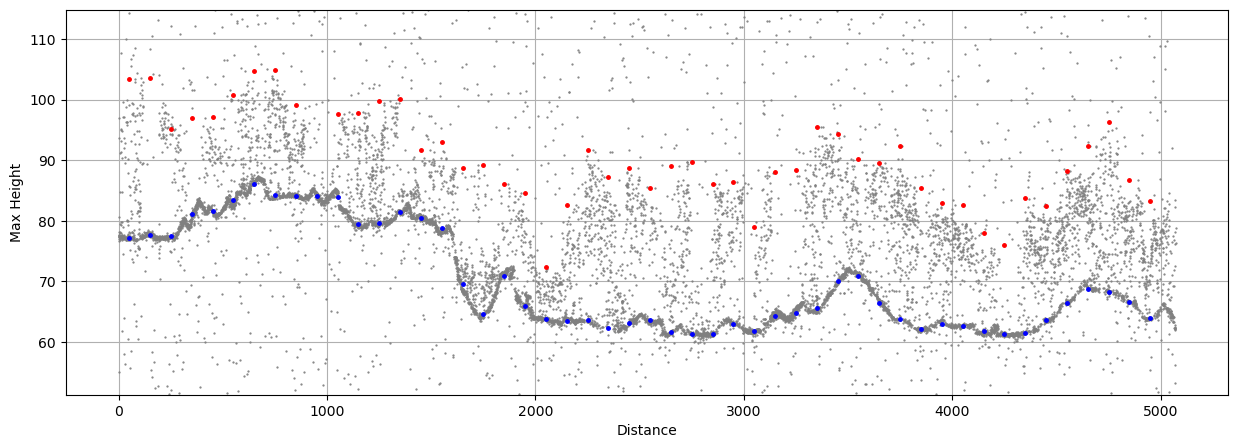

In [27]:
# Example array to specify which quality flags to consider
user_quality_flags = [1, 0, 0]  # Only consider quality flag 1
segment = 100

with open('variables.json', 'r') as json_file:
    variables = json.load(json_file)

# Remove tolist() for regular Python lists
variables['user_quality_flags'] = user_quality_flags
variables['segment'] = segment

with open('variables.json', 'w') as json_file:
    json.dump(variables, json_file)


%run CanopyFlagging

## Comparison

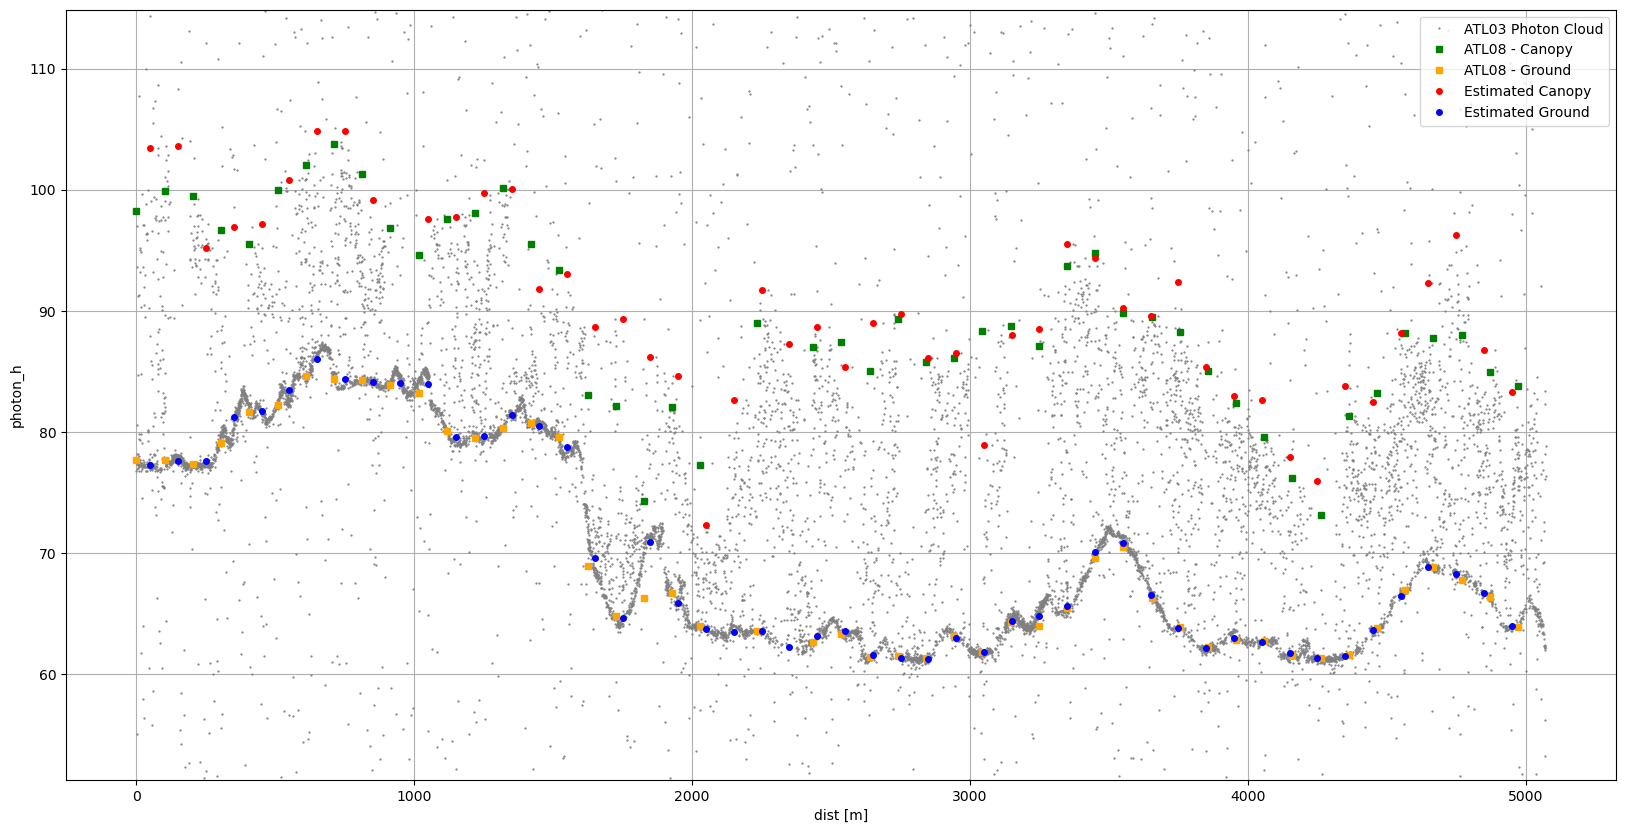

Mean of ATL08 ground_h:  70.00074 [m] ---- Mean of ground_mean:  69.95280078493332 [m]


Mean of ATL08 canopy_h:  89.48597 [m] ---- Mean of h_max:  90.3966794695173 [m]


In [28]:
%run ComparisonWithATL08.py